# **Car Price Prediction with Machine Learning**

## **Import Required Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## **Load the dataset**

In [ ]:
df=pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## **Exploratory Data Analysis (EDA)**

In [ ]:
#Check for Missing Values

print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
#Summary Statistics
print(df.describe())


              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


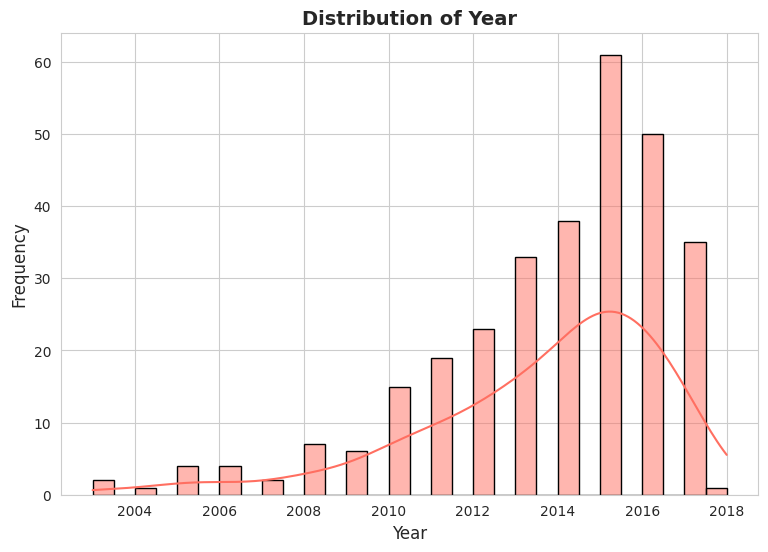

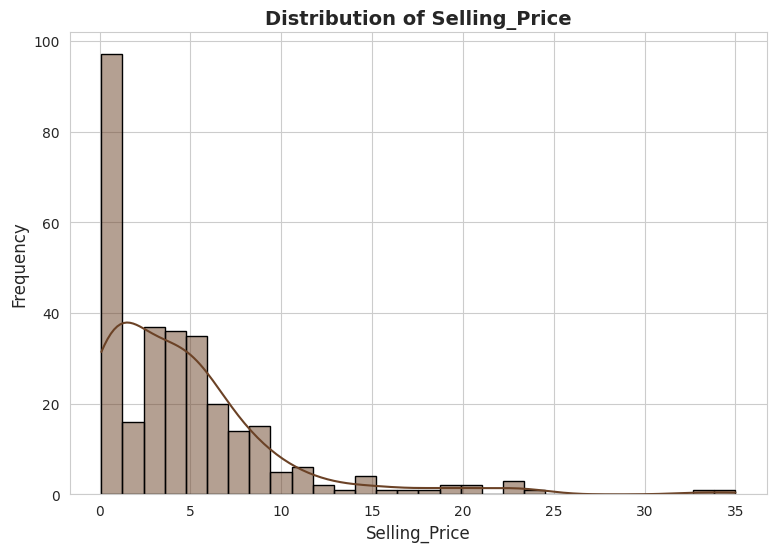

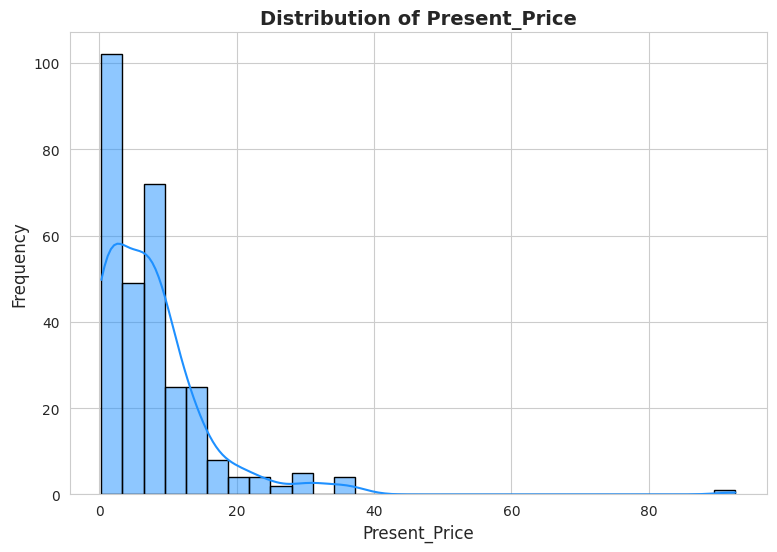

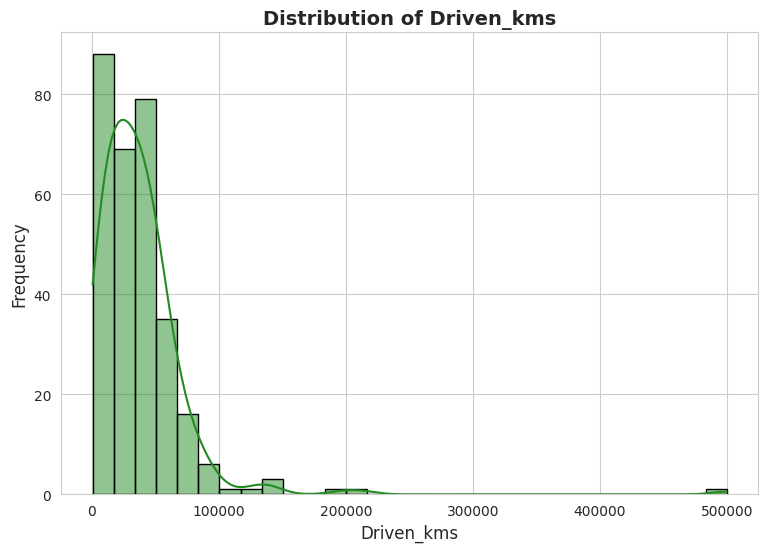

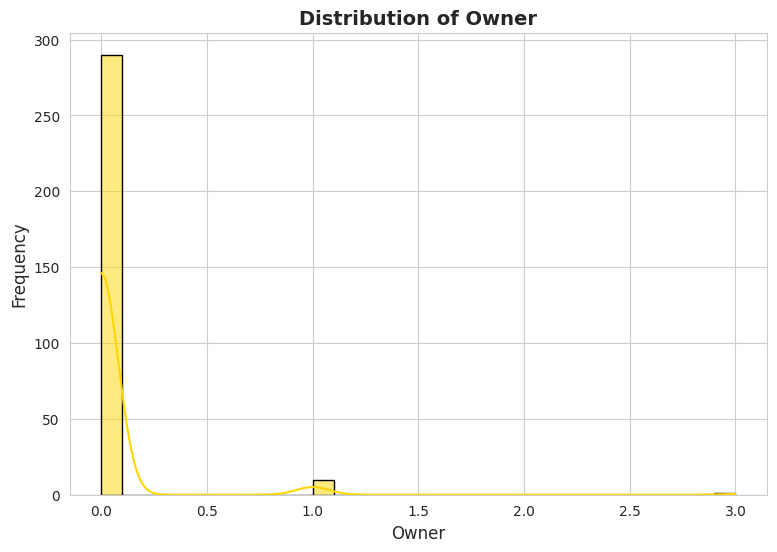

In [ ]:
sns.set_style("whitegrid")  # Use a clean Seaborn style

# Define a color palette for variety
colors = ['#FF6F61', '#6B4226', '#1E90FF', '#228B22', '#FFD700', '#8A2BE2']

# Loop through numerical columns and plot histograms
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    fig, ax = plt.subplots(figsize=(9, 6))  # Increase figure size

    # Use different colors from the list
    sns.histplot(df[column], bins=30, color=colors[i % len(colors)], edgecolor='black', kde=True, ax=ax)

    # Improve title and labels
    ax.set_title(f"Distribution of {column}", fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

    plt.show()


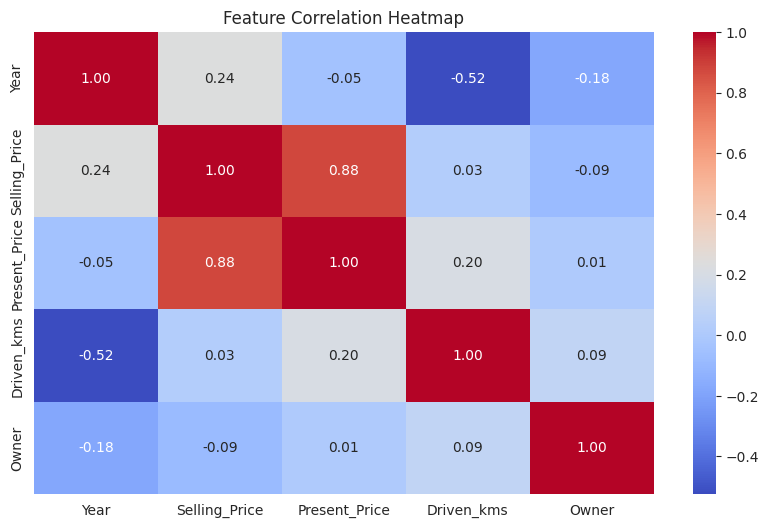

In [ ]:
#Correlation Heatmap
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


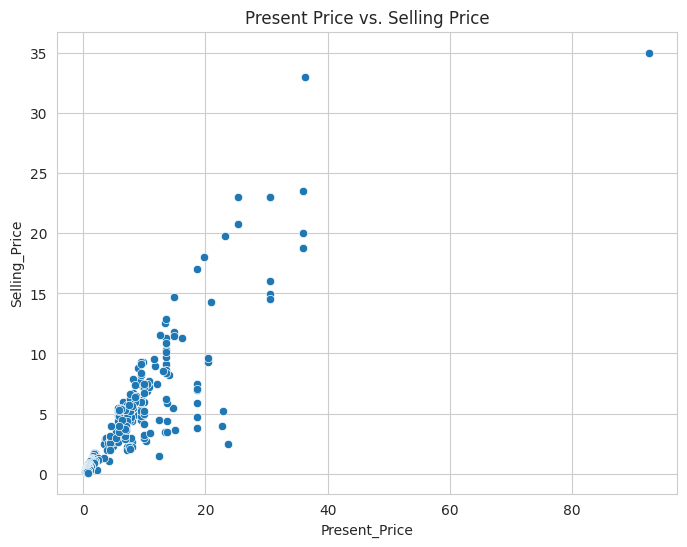

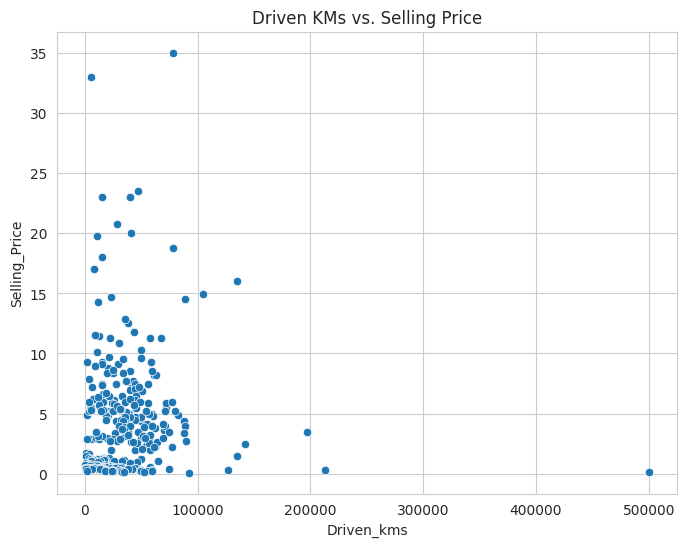

In [ ]:
#Relationship Between Features and Target Variable

# Selling Price vs. Present Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Present_Price"], y=df["Selling_Price"])
plt.title("Present Price vs. Selling Price")
plt.show()

# Selling Price vs. Driven KMs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Driven_kms"], y=df["Selling_Price"])
plt.title("Driven KMs vs. Selling Price")
plt.show()


## **Data Preprocessing**

In [ ]:
# Calculate Car Age
df["Car_Age"] = 2025 - df["Year"]

# Drop 'Year' and 'Car_Name' (not useful for prediction)
df.drop(columns=["Year", "Car_Name"], inplace=True)


In [ ]:
#Convert Categorical Features into Numerical
df = pd.get_dummies(df, columns=["Fuel_Type", "Selling_type", "Transmission"], drop_first=True)


In [ ]:
print(df.head())


   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


In [ ]:
#Train-Test Split
X = df.drop(columns=["Selling_Price"])  # Features
y = df["Selling_Price"]  # Target Variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Train Machine Learning Model**

In [ ]:
# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### **Model Evaluation**

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.64
Root Mean Squared Error (RMSE): 0.97
R² Score: 0.96


## **Feature Importance**

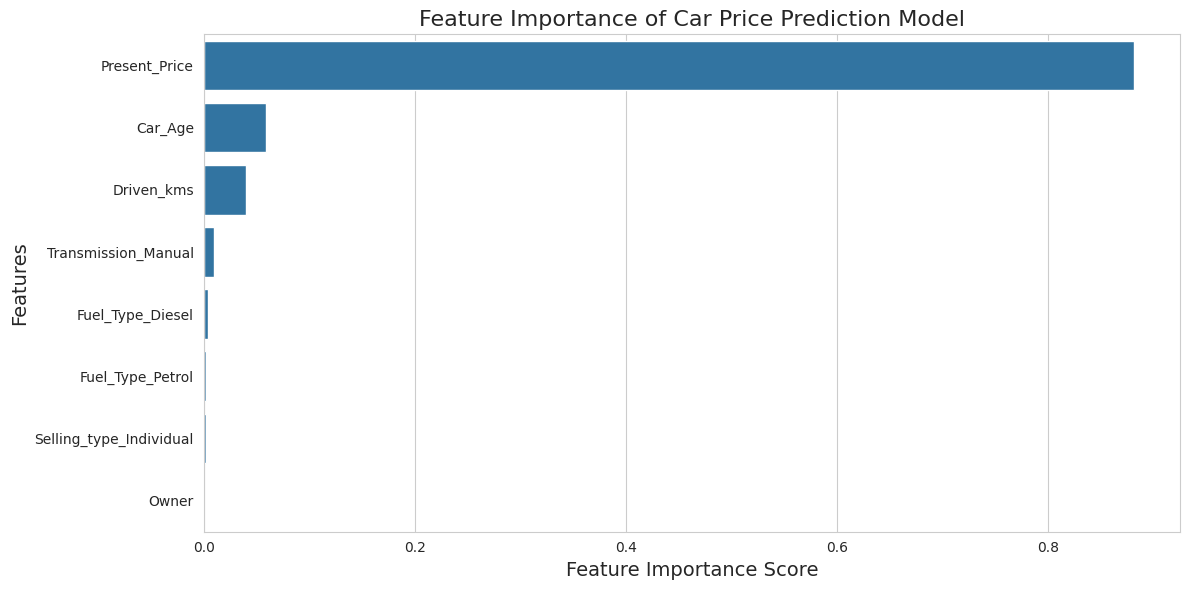

In [ ]:
# Get feature importance values
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better sorting and visualization
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)  # Sort by importance

# Plot
plt.figure(figsize=(12, 6))  # Increase figure size
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance of Car Price Prediction Model", fontsize=16)
plt.tight_layout()  # Adjust spacing
plt.show()


## **Saving the Trained Model for Future Use**

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'car_price_prediction_model.pkl')

# To load the model back later
loaded_model = joblib.load('car_price_prediction_model.pkl')

# Predict using the loaded model
predicted_price = loaded_model.predict(new_car_df)
print(f"The predicted price for the new car is: {predicted_price[0]:.2f} Lakhs")


The predicted price for the new car is: 0.37 Lakhs
